In [1]:
from sklearn.datasets import make_regression
# 가상의 회귀분석 데이터 생성 함수
# n_features : 독립변수의 갯수, bias: y절편,
# noise: y의 표준편차
# coef: 회귀계수(기울기) 사용 여부, True이면 w값을 리턴함
X, y, w = make_regression(n_samples=50, n_features=1, bias=100, noise=10, random_state=0, coef=True)
print(X[:5].flatten())
print(y[:5])
print(w)


[-0.85409574  1.49407907 -0.34791215  0.44386323 -0.18718385]
[ 69.16576208 129.94932345  80.01389923 100.30585701 107.20314663]
15.896958364551972


In [2]:
import numpy as np
xx = np.linspace(-3, 3, 100)
y0 = w * xx + 100


Text(0.5, 1.0, 'regression')

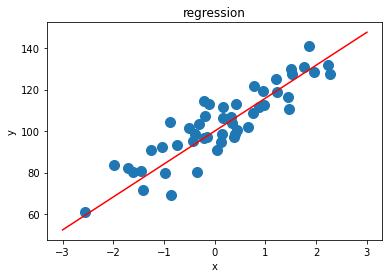

In [3]:
import matplotlib.pyplot as plt
plt.plot(xx, y0, "r-")
plt.scatter(X, y, s=100)
plt.xlabel("x")
plt.ylabel("y")
plt.title("regression")

In [4]:
#OLS, Ordinary Least Squares
from sklearn.datasets import make_regression

bias = 100
X, y, w = make_regression( n_samples=200, n_features=1, bias=bias, noise=10, coef=True, random_state=1)
print(X[:5])
print(y[:5])
print(w)

[[ 0.23249456]
 [-0.03869551]
 [ 0.5505375 ]
 [ 0.50318481]
 [ 2.18697965]]
[127.87901739  93.03291422 161.8575084  141.69205026 283.26011945]
86.44794300545998


In [5]:
# 사이킷런 패키지의 회귀분석 함수
from sklearn.linear_model import LinearRegression
model = LinearRegression().fit(X, y)
# 절편(상수항), 가중치 (기울기)
print(model.intercept_, model.coef_)


99.79150868986945 [86.96171201]


In [6]:
# 새로운 입력값에 대한 예측 (2차원 배열로 입력해야 함)
model.predict([[-2], [-1], [0], [1], [2]])

array([-74.13191534,  12.82979668,  99.79150869, 186.7532207 ,
       273.71493272])

In [7]:
print(X.flatten()[:5])
print(y[:5])

[ 0.23249456 -0.03869551  0.5505375   0.50318481  2.18697965]
[127.87901739  93.03291422 161.8575084  141.69205026 283.26011945]


In [8]:
import pandas as pd
df = pd.DataFrame({'x':X.flatten(), 'y':y})
df

,x,y
0,0.232495,127.879017
1,-0.038696,93.032914
2,0.550537,161.857508
3,0.503185,141.692050
4,2.186980,283.260119
...,...,...
195,-0.172428,87.874277
196,-1.199268,-13.626664
197,1.462108,216.106619
198,1.131629,212.743149


In [9]:
import statsmodels.api as sm
X = df[["x"]]
y = df[["y"]]
# 최소자승법(OLS, Ordinary Least Squares)
model = sm.OLS(y, X)
result = model.fit()
result.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.457
Model:                            OLS   Adj. R-squared (uncentered):              0.454
Method:                 Least Squares   F-statistic:                              167.2
Date:                Mon, 23 May 2022   Prob (F-statistic):                    3.66e-28
Time:                        17:58:49   Log-Likelihood:                         -1204.0
No. Observations:                 200   AIC:                                      2410.
Df Residuals:                     199   BIC:                                      2413.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x             99.6428      7.706     12.931      0.000      84.448     114.838
==============================================================================
Omnibus:                        0.691   Durbin-Watson:                   0.046
Prob(Omnibus):                  0.708   Jarque-Bera (JB):                0.415
Skew:                           0.079   Prob(JB):                        0.813
Kurtosis:                       3.158   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [10]:
#새로운 값 예측
result.predict([-2, -1, 0, 1, 2])

array([-199.28565959,  -99.64282979,    0.        ,   99.64282979,
        199.28565959])

In [11]:
# 가중치 (기울기)
result.params

x    99.64283
dtype: float64

In [12]:
# 잔차 (실제값과 예측값의 차이)
result.resid

0      104.712602
1       96.888644
2      107.000394
3       91.553292
4       65.343279
          ...    
195    105.055511
196    105.871796
197     70.418046
198     99.984395
199    100.673331
Length: 200, dtype: float64

Text(0, 0.5, 'Residual')

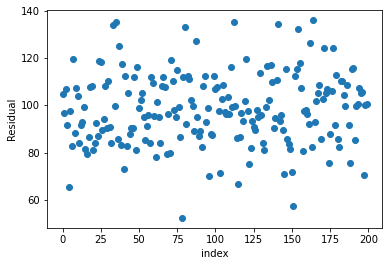

In [13]:
#잔차 벡터 그래프
import matplotlib.pyplot as plt
result.resid.plot(style="o")
plt.xlabel("index")
plt.ylabel("Residual")

In [14]:
from sklearn.datasets import make_regression
import statsmodels.api as sm
import pandas as pd

X, y, coef = make_regression(
n_samples=100, n_features=1, noise=30, coef=True, random_state=0)
dfX = pd.DataFrame(X, columns=["X"])
# dfX = sm.add_constant(dfX0)
dfy = pd.DataFrame(y, columns=["Y"])
df = pd.concat([dfX, dfy], axis=1)
model = sm.OLS.from_formula("Y ~ X", data=df)
result = model.fit()
result.predict(dfX)


0    -17.934714
1     39.638175
2     14.893262
3    -37.478808
4    -40.694820
        ...    
95   -52.645684
96   -18.072076
97    12.912314
98   -71.981016
99   -53.312776
Length: 100, dtype: float64

In [15]:
# Total Sum of Square( 종속변수 y의 분산 )
print("TSS = ", result.uncentered_tss)
# Explained Sum of Square( 예측값의 분산 )
print("ESS = ", result.mse_model)
# Residual Sum of Square( 잔차의 분산, 오차의 크기 )
# 0에 가까울수록 좋은 모형
print("RSS = ", result.ssr)
# 결정계수 : 모형의 설명력 ( 0~1 사이의 값)
# 1- RSS/TSS=ESS/TSS
print("R squared=", result.rsquared)

TSS =  291345.75789830607
ESS =  188589.61349210917
RSS =  102754.33755137533
R squared= 0.6473091780922586


In [16]:
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.647
Model:                            OLS   Adj. R-squared:                  0.644
Method:                 Least Squares   F-statistic:                     179.9
Date:                Mon, 23 May 2022   Prob (F-statistic):           6.60e-24
Time:                        17:58:50   Log-Likelihood:                -488.64
No. Observations:                 100   AIC:                             981.3
Df Residuals:                      98   BIC:                             986.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -2.4425      3.244     -0.753      0.4

In [17]:
from scipy import stats
# 1973년 뉴욕의 공기의 질을 측정한 데이터셋
# 회귀분석 예제2 : 오존 데이터셋 (온도에 따른 오존량 예측)
# 독립변수 : 온도, 종속변수 : 오존량
# 귀무가설 : 온도가 오존량에 영향을 미치지 않는다.
# 대립가설 : 온도가 오존량에 영향을 미친다
# csv 파일을 로딩
df = pd.read_csv("c:/data/ozone/ozone.csv")
# 데이터의 컬럼명 변경
print(df.head())

   Ozone  Solar.R  Wind  Temp  Month  Day
0   41.0    190.0   7.4    67      5    1
1   36.0    118.0   8.0    72      5    2
2   12.0    149.0  12.6    74      5    3
3   18.0    313.0  11.5    62      5    4
4    NaN      NaN  14.3    56      5    5


In [18]:
#결측값이 있는 행 제거
df2=df.dropna(axis=0)
df2.head()

,Ozone,Solar.R,Wind,Temp,Month,Day
0,41.0,190.0,7.4,67,5,1
1,36.0,118.0,8.0,72,5,2
2,12.0,149.0,12.6,74,5,3
3,18.0,313.0,11.5,62,5,4
6,23.0,299.0,8.6,65,5,7


In [19]:
# 기울기(slope), 절편(intercept), 상관계수(rvalue), p-value( 예측 불확실성의 정도를 나타내는 값)
# 에러의 표준편차(stderr)
#p-value는 0.05 미만일 때 통계적으로 유의함
x2 = df2["Temp"].values
print(x2)

[67 72 74 62 65 59 61 69 66 68 58 64 66 57 68 62 59 73 61 61 67 81 79 76
 82 90 87 82 77 72 65 73 76 84 85 81 83 83 88 92 92 89 73 81 80 81 82 84
 87 85 74 86 85 82 86 88 86 83 81 81 81 82 89 90 90 86 82 80 77 79 76 78
 78 77 72 79 81 86 97 94 96 94 91 92 93 93 87 84 80 78 75 73 81 76 77 71
 71 78 67 76 68 82 64 71 81 69 63 70 75 76 68]


In [20]:
y2 = df2["Ozone"].values
print(y2)


[ 41.  36.  12.  18.  23.  19.   8.  16.  11.  14.  18.  14.  34.   6.
  30.  11.   1.  11.   4.  32.  23.  45. 115.  37.  29.  71.  39.  23.
  21.  37.  20.  12.  13. 135.  49.  32.  64.  40.  77.  97.  97.  85.
  10.  27.   7.  48.  35.  61.  79.  63.  16.  80. 108.  20.  52.  82.
  50.  64.  59.  39.   9.  16. 122.  89. 110.  44.  28.  65.  22.  59.
  23.  31.  44.  21.   9.  45. 168.  73.  76. 118.  84.  85.  96.  78.
  73.  91.  47.  32.  20.  23.  21.  24.  44.  21.  28.   9.  13.  46.
  18.  13.  24.  16.  13.  23.  36.   7.  14.  30.  14.  18.  20.]


In [21]:
result=stats.linregress(x2, y2)
result
# 모형의 적합도 : R2값이 0이 아니므로 추정하는 회귀함수가 유의미하다.
# R2값이 0.69이 모델은 69%의 설명력이 있음
# 귀무가설 : 온도가 오존량에 영향을 미치지 않는다
# 대립가설 : 온도가 오존량에 영향을 미친다
# p_value : 1.552677229392932e-17는 0.05보다 작으므로 통계적으로 유의함
# 따라서 귀무가설을 기각하고 대립가설을 채택한다
# 결론: 온도가 오존량에 영향을 미친다.

LinregressResult(slope=2.439109905529362, intercept=-147.64607238059494, rvalue=0.6985414096486389, pvalue=1.552677229392932e-17, stderr=0.23931937849409174, intercept_stderr=18.755251765306646)

Text(0, 0.5, '오존량')

c:\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 50728 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 46020 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 54868 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 50472 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 50724 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 51316 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\anaconda3\lib\site-

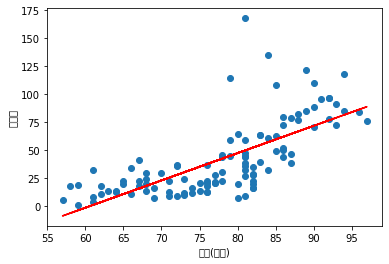

In [22]:
slope, intercept, r_value, p_value, stderr = stats.linregress(x2, y2)
#산점도 그리기
plt.scatter(x2,y2)
#회귀선 그리기
plt.plot(x2, slope*x2 +intercept, c="red")
plt.xlabel("온도(화씨)")
plt.ylabel("오존량")

In [23]:
# 온도가 화씨 80도일 때 오존량 예측
80 * slope + intercept

47.48272006175401

In [24]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn import datasets

In [25]:
# 붓꽃 데이터 로딩
iris = datasets.load_iris()
print(iris)

{'data': array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
     

In [26]:
#변수명 확인
print(iris['feature_names'])

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [27]:
# SepalWidth(꽃받침의 너비)로 SepalLength(꽃받침의 길이)를 예측
# 귀무가설 : 꽃받침의 너비와 꽃받침의 길이는 상관관계가 없다
# 대립가설 : 꽃받침의 너비와 꽃받침의 길이는 상관관계가 있다
X = iris.data[:, 1]
y = iris.data[:, 0]

In [29]:
result=stats.linregress(X, y)
result
# pvalue가 0.05 보다 크므로 모델이 유의하지는 않음, 모델의 설명력 -11.7%
# 결론 : 꽃받침의 너비와 꽃받침의 길이는 상관관계가 없다.

LinregressResult(slope=-0.2233610611298999, intercept=6.526222550894481, rvalue=-0.11756978413300208, pvalue=0.15189826071144782, stderr=0.15508092994240763, intercept_stderr=0.4788963398440871)

Text(0, 0.5, 'SepalLength')

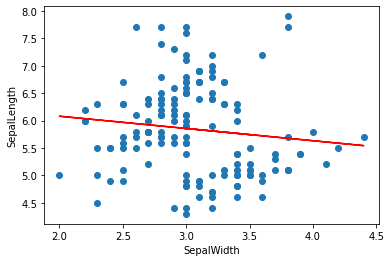

In [30]:
slope, intercept, r_value, p_value, stderr = stats.linregress(X, y)
x1 = np.array(X)
#산점도 그리기
plt.scatter(X,y)
#회귀선 그리기
plt.plot(x1, slope*x1 +intercept, c="red")
plt.xlabel("SepalWidth")
plt.ylabel("SepalLength")

In [31]:
# Petal.Width(꽃잎의 너비)로 Petal.Length(꽃잎의 길이)를 예측
X = iris.data[:, 3]
y = iris.data[:, 2]

In [32]:
result=stats.linregress(X, y)
result
# pvalue가 0.05보다 작으므로 모델이 유의함, 모델의 설명력 96.2% 
# 결론 : 꽃잎의 너비와 꽃잎의 길이는 강한 양의 상관관계가 있다

LinregressResult(slope=2.229940495121865, intercept=1.08355803285051, rvalue=0.9628654314027963, pvalue=4.6750039073255014e-86, stderr=0.0513962314651412, intercept_stderr=0.07296696269883872)